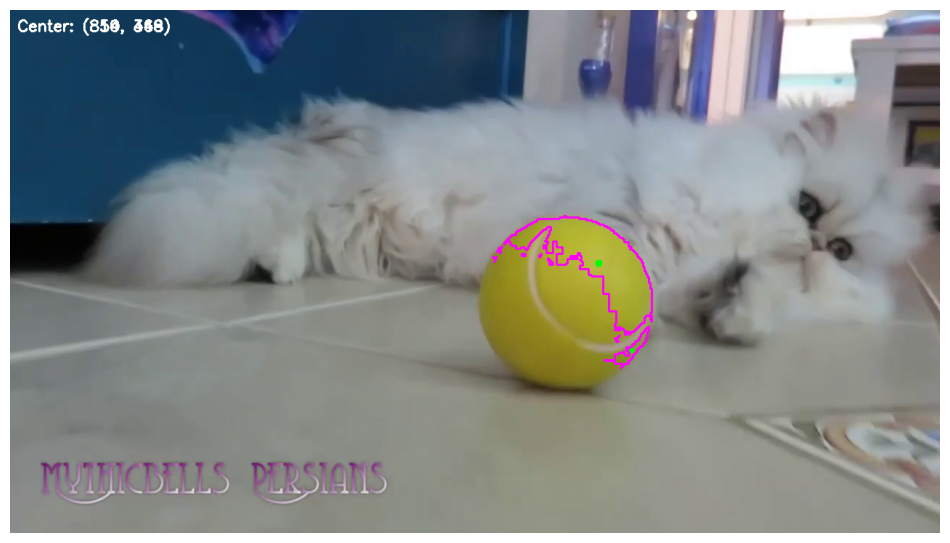

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import display, clear_output

uploaded = files.upload()
video_path = next(iter(uploaded))

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    raise IOError("Ошибка открытия видео.")

# Обновленные границы для лаймового цвета
lower_color = np.array([30, 100, 100])  # Нижняя граница
upper_color = np.array([90, 255, 255])  # Верхняя граница

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.7
fontColor = (255, 255, 255)
lineThickness = 2

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        mask = cv2.inRange(hsv, lower_color, upper_color)
        contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        count = 0
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 100:
                count += 1

                M = cv2.moments(contour)

                if M['m00'] != 0:
                    center_x = int(M['m10'] / M['m00'])
                    center_y = int(M['m01'] / M['m00'])

                    cv2.circle(frame, (center_x, center_y), 5, (0, 255, 0), -1)

                    cv2.drawContours(frame, contours, -1, (255, 0, 255), 2)

                    cv2.putText(frame, f'Center: ({center_x}, {center_y})', (10, 30), font, fontScale, fontColor, lineThickness)

        if count == 0:
            cv2.putText(frame, 'Object not found', (10, 30), font, fontScale, fontColor, lineThickness)

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 8))
        plt.imshow(frame_rgb)
        plt.axis('off')
        clear_output(wait=True)
        display(plt.gcf())
        plt.close()

except KeyboardInterrupt:
    pass
finally:
    cap.release()

